# Regression Exercise
Using Regression to predict wine quality.

## Import Our Libraries

In [57]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd
# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

# IMPORT OUR LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGERSSOR MODEL
from sklearn.ensemble import RandomForestRegressor


# IM LEAVING THERES HERE BECAUSE IM NICE
# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# HELPER FUNCTION WITH Z-SCORES TO REMOVE OUTLIERS
import scipy.stats as stats

%matplotlib inline

# Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.

# STEP 1 (i): Inspect and explore data
1. Use `data/winequality-white.csv`

In [58]:
# READ IN THE DATA USING PANDAS 
df = pd.read_csv('data/winequality-white.csv')

# DISPLAY THE FIRST 5 ROWS
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide    pH  sulphates  alcohol  \
0                 45.0                 170.0  3.00       0.45      8.8   
1                 14.0                 132.0  3.30       0.49      9.5   
2                 30.0                  97.0  3.26       0.44     10.1   
3                 47.0                 186.0  3.19       0.40      9.9   
4                 47.0                 186.0  3.19       0.40      9.9   

   quality  
0        6  
1        6  
2        6  
3        6  
4        6

# Inspect our data using `df.describe()` function.

In [59]:
# Inspect our data using `df.describe()` function.
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4893.000000       4893.000000  4893.000000     4893.000000   
mean        6.854210          0.278221     0.334139        6.393736   
std         0.843637          0.100831     0.121048        5.072990   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide           pH  \
count  4893.000000          4893.000000           4893.000000  4893.000000   
mean      0.045791            35.310035            138.383507     3.188144   
std       0.021850            17.011384             42.509982     0.151011   
min       0.009000             2.000000              9.000000     2.720000   
25%       0.036000            23.000000            108.000000     3.090000   
50%       0.043000            34.000000            134.000000     3.180000   
75%       0.050000            46.000000            167.000000     3.280000   
max       0.346000           289.000000            440.000000     3.820000   

         sulphates      alcohol      quality  
count  4893.000000  4893.000000  4893.000000  
mean      0.489871    10.512565     5.874719  
std       0.114151     1.229755     0.880446  
min       0.220000     8.000000     3.000000  
25%       0.410000     9.500000     5.000000  
50%       0.470000    10.400000     6.000000  
75%       0.550000    11.400000     6.000000  
max       1.080000    14.200000     8.000000

# Check for Nulls.

In [60]:
# Check for Nulls.
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Check for Duplicates

In [61]:
# Check for Duplicates
df.duplicated().sum()


937

In [62]:
# Remove duplicates
print(df.shape)


# REMOVE DUPLICATES HERE
df = df.drop_duplicates()
# Sanity check
print(df.shape)

(4893, 11)
(3956, 11)


# Visualize our data to discover outliers.
* Use `sns.pariplot`

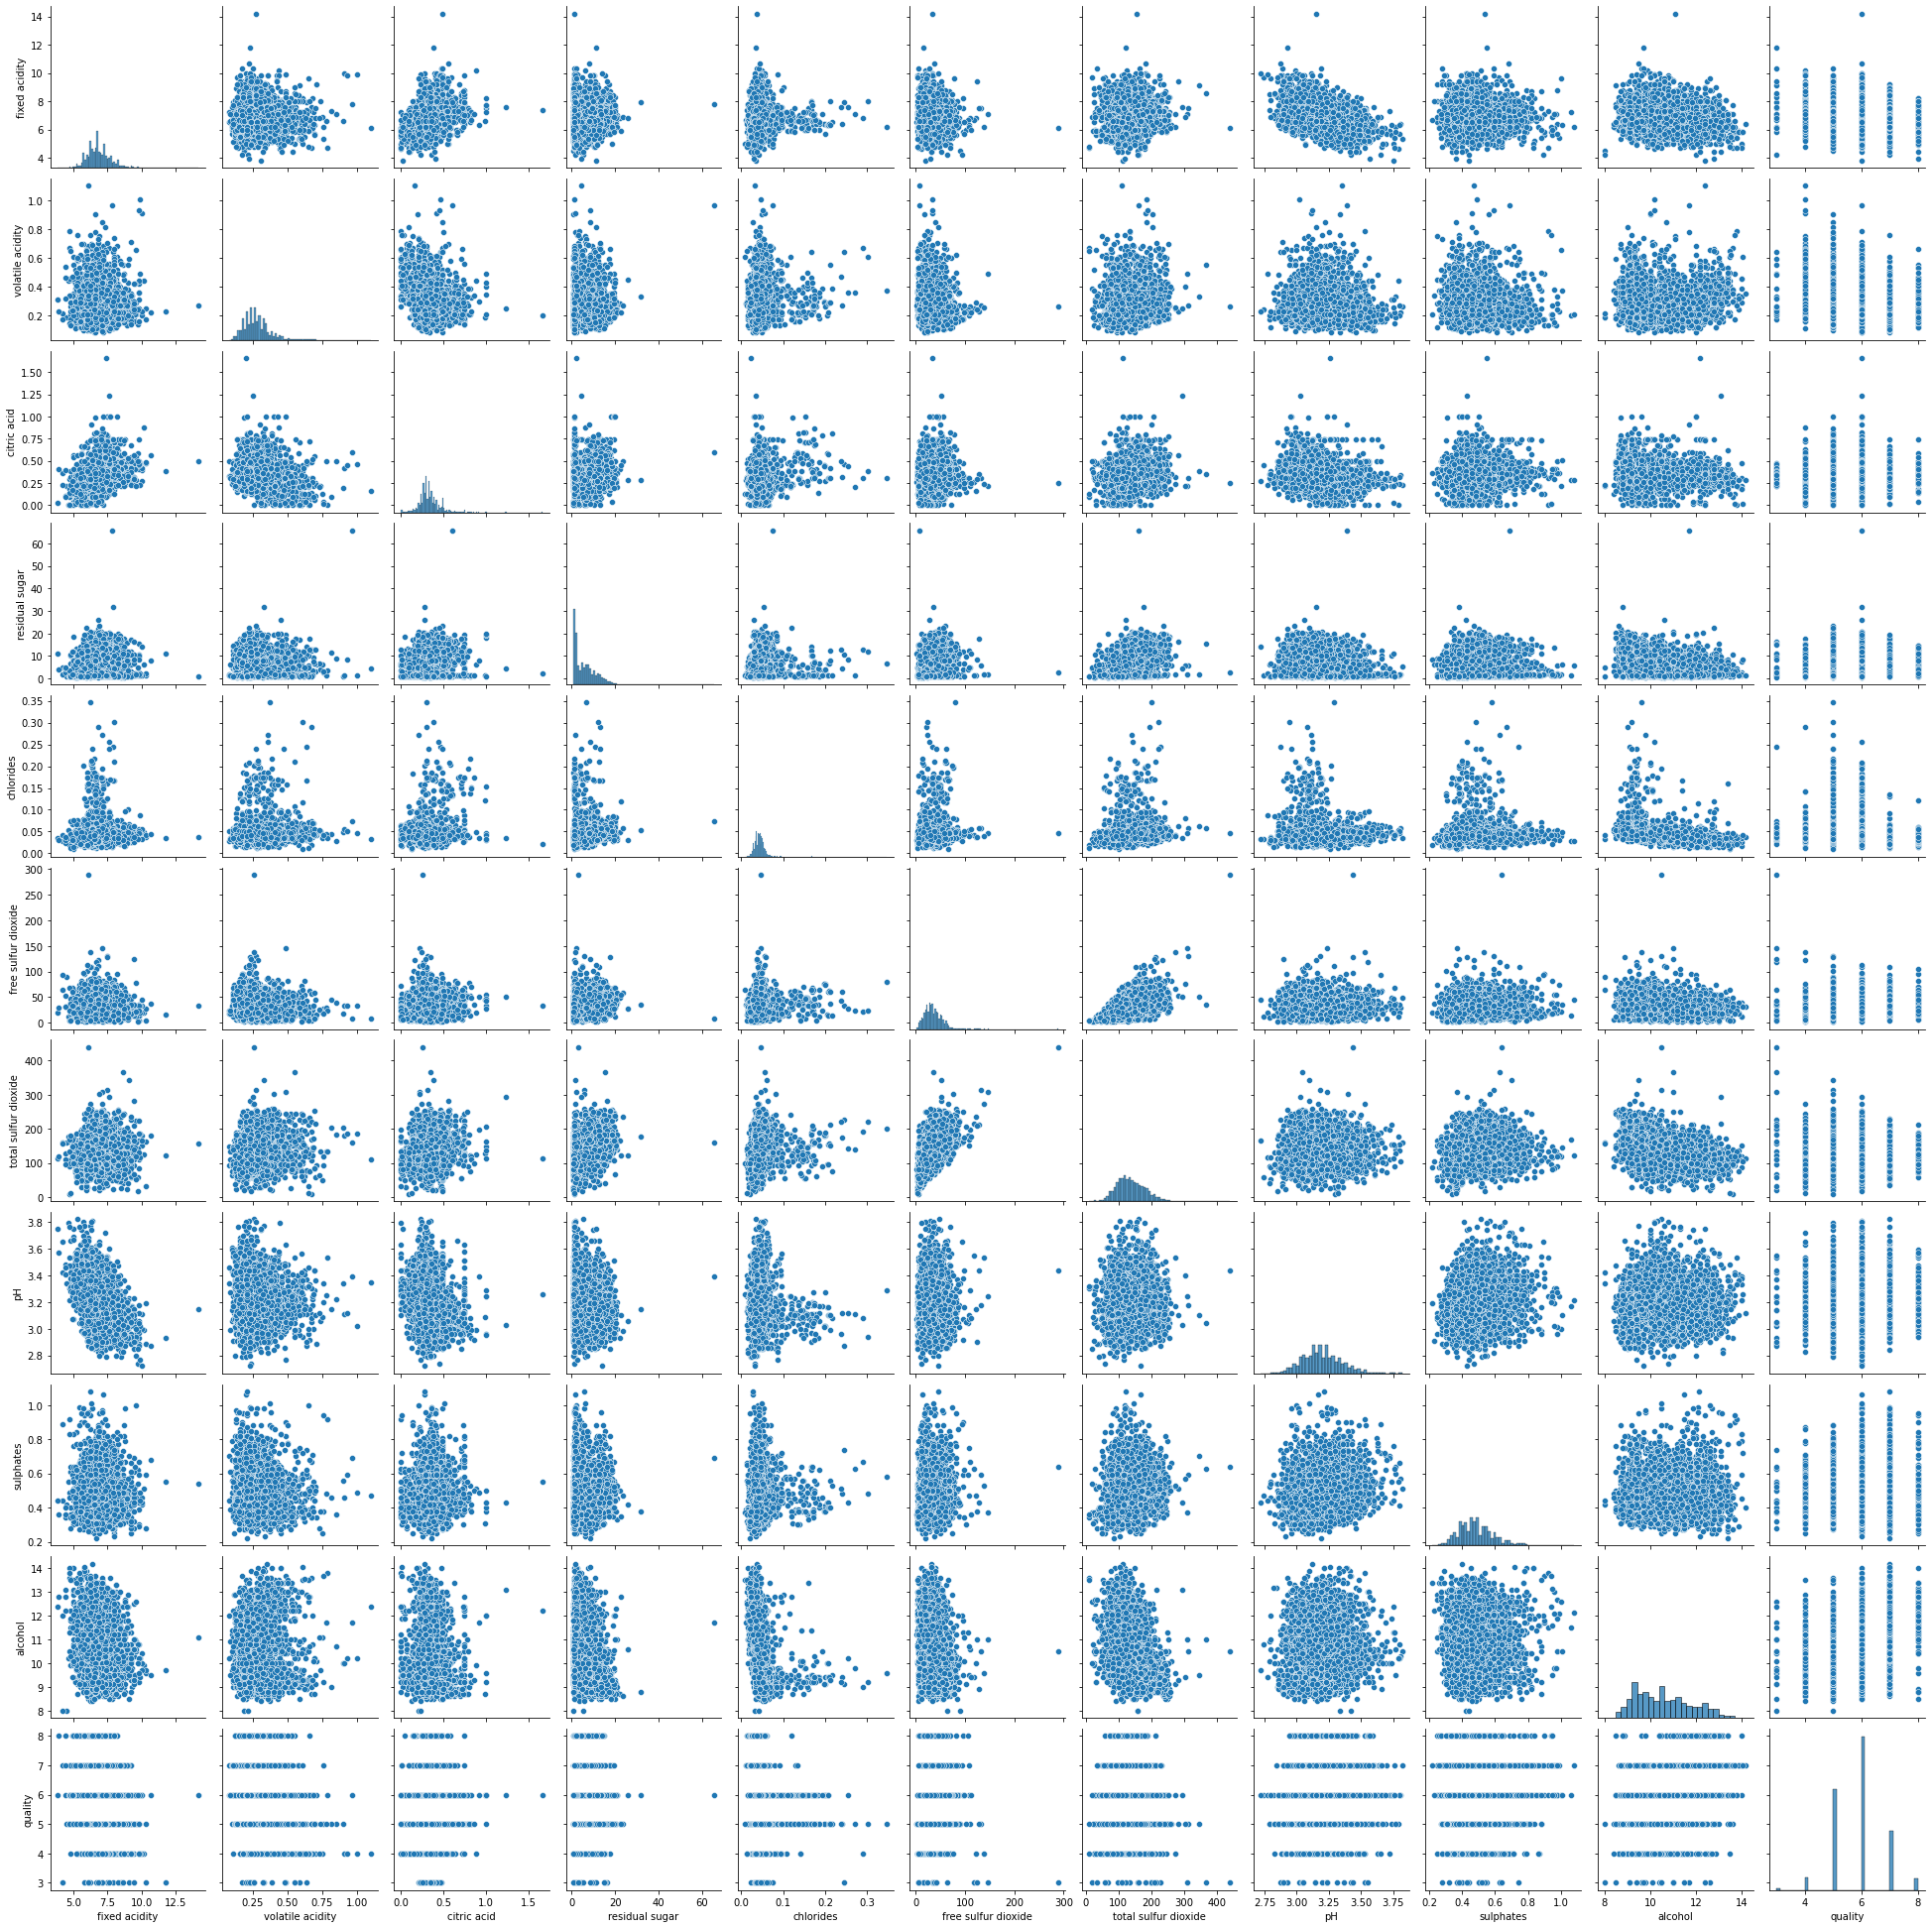

In [63]:
# Visualize our data to discover outliers.
sns.pairplot(data=df)

___
# STEP 2  (s):  Select and Engineer Features

# Remove outliers
* Make sure you DO NOT remove outliers from our target variable of `quality`.

In [64]:
# Keep this for later
original_cols = df.columns

# Set the columns you want to remove outliers for
target_cols = ['total sulfur dioxide', 'fixed acidity', 'volatile acidity', 
               'chlorides', 'free sulfur dioxide', 'pH', 'sulphates',
               'alcohol']

# Make a new list that is going to contain our z-score
z_score_cols = []

# Loop through our target columns
for col in target_cols:
    # Make the new column name the same as the original but with 'z_score' added to it
    new_col_name = col + "_zscore"
    
    # Set the new column equal to the score
    df[new_col_name] = stats.stats.zscore(df[col])
    
    # Set the z-score to its absolute value of the for easier filtering
    df[new_col_name] = abs(df[new_col_name])
    
    # Append the new column name our our z_score_cols list for easier access for later.
    z_score_cols.append(new_col_name)

condition = df[z_score_cols] < 3
print(df.shape)


# Say TRUE only if all of the rows are True, else return False
condition = condition.all(axis=1)

print('Before removal of outliers', df.shape)

# Apply our condition to our dataframe and replace our current dataframe with the applied condition.
df =  df[condition]

print('After removal of outliers', df.shape)

(3956, 19)
Before removal of outliers (3956, 19)
After removal of outliers (3686, 19)


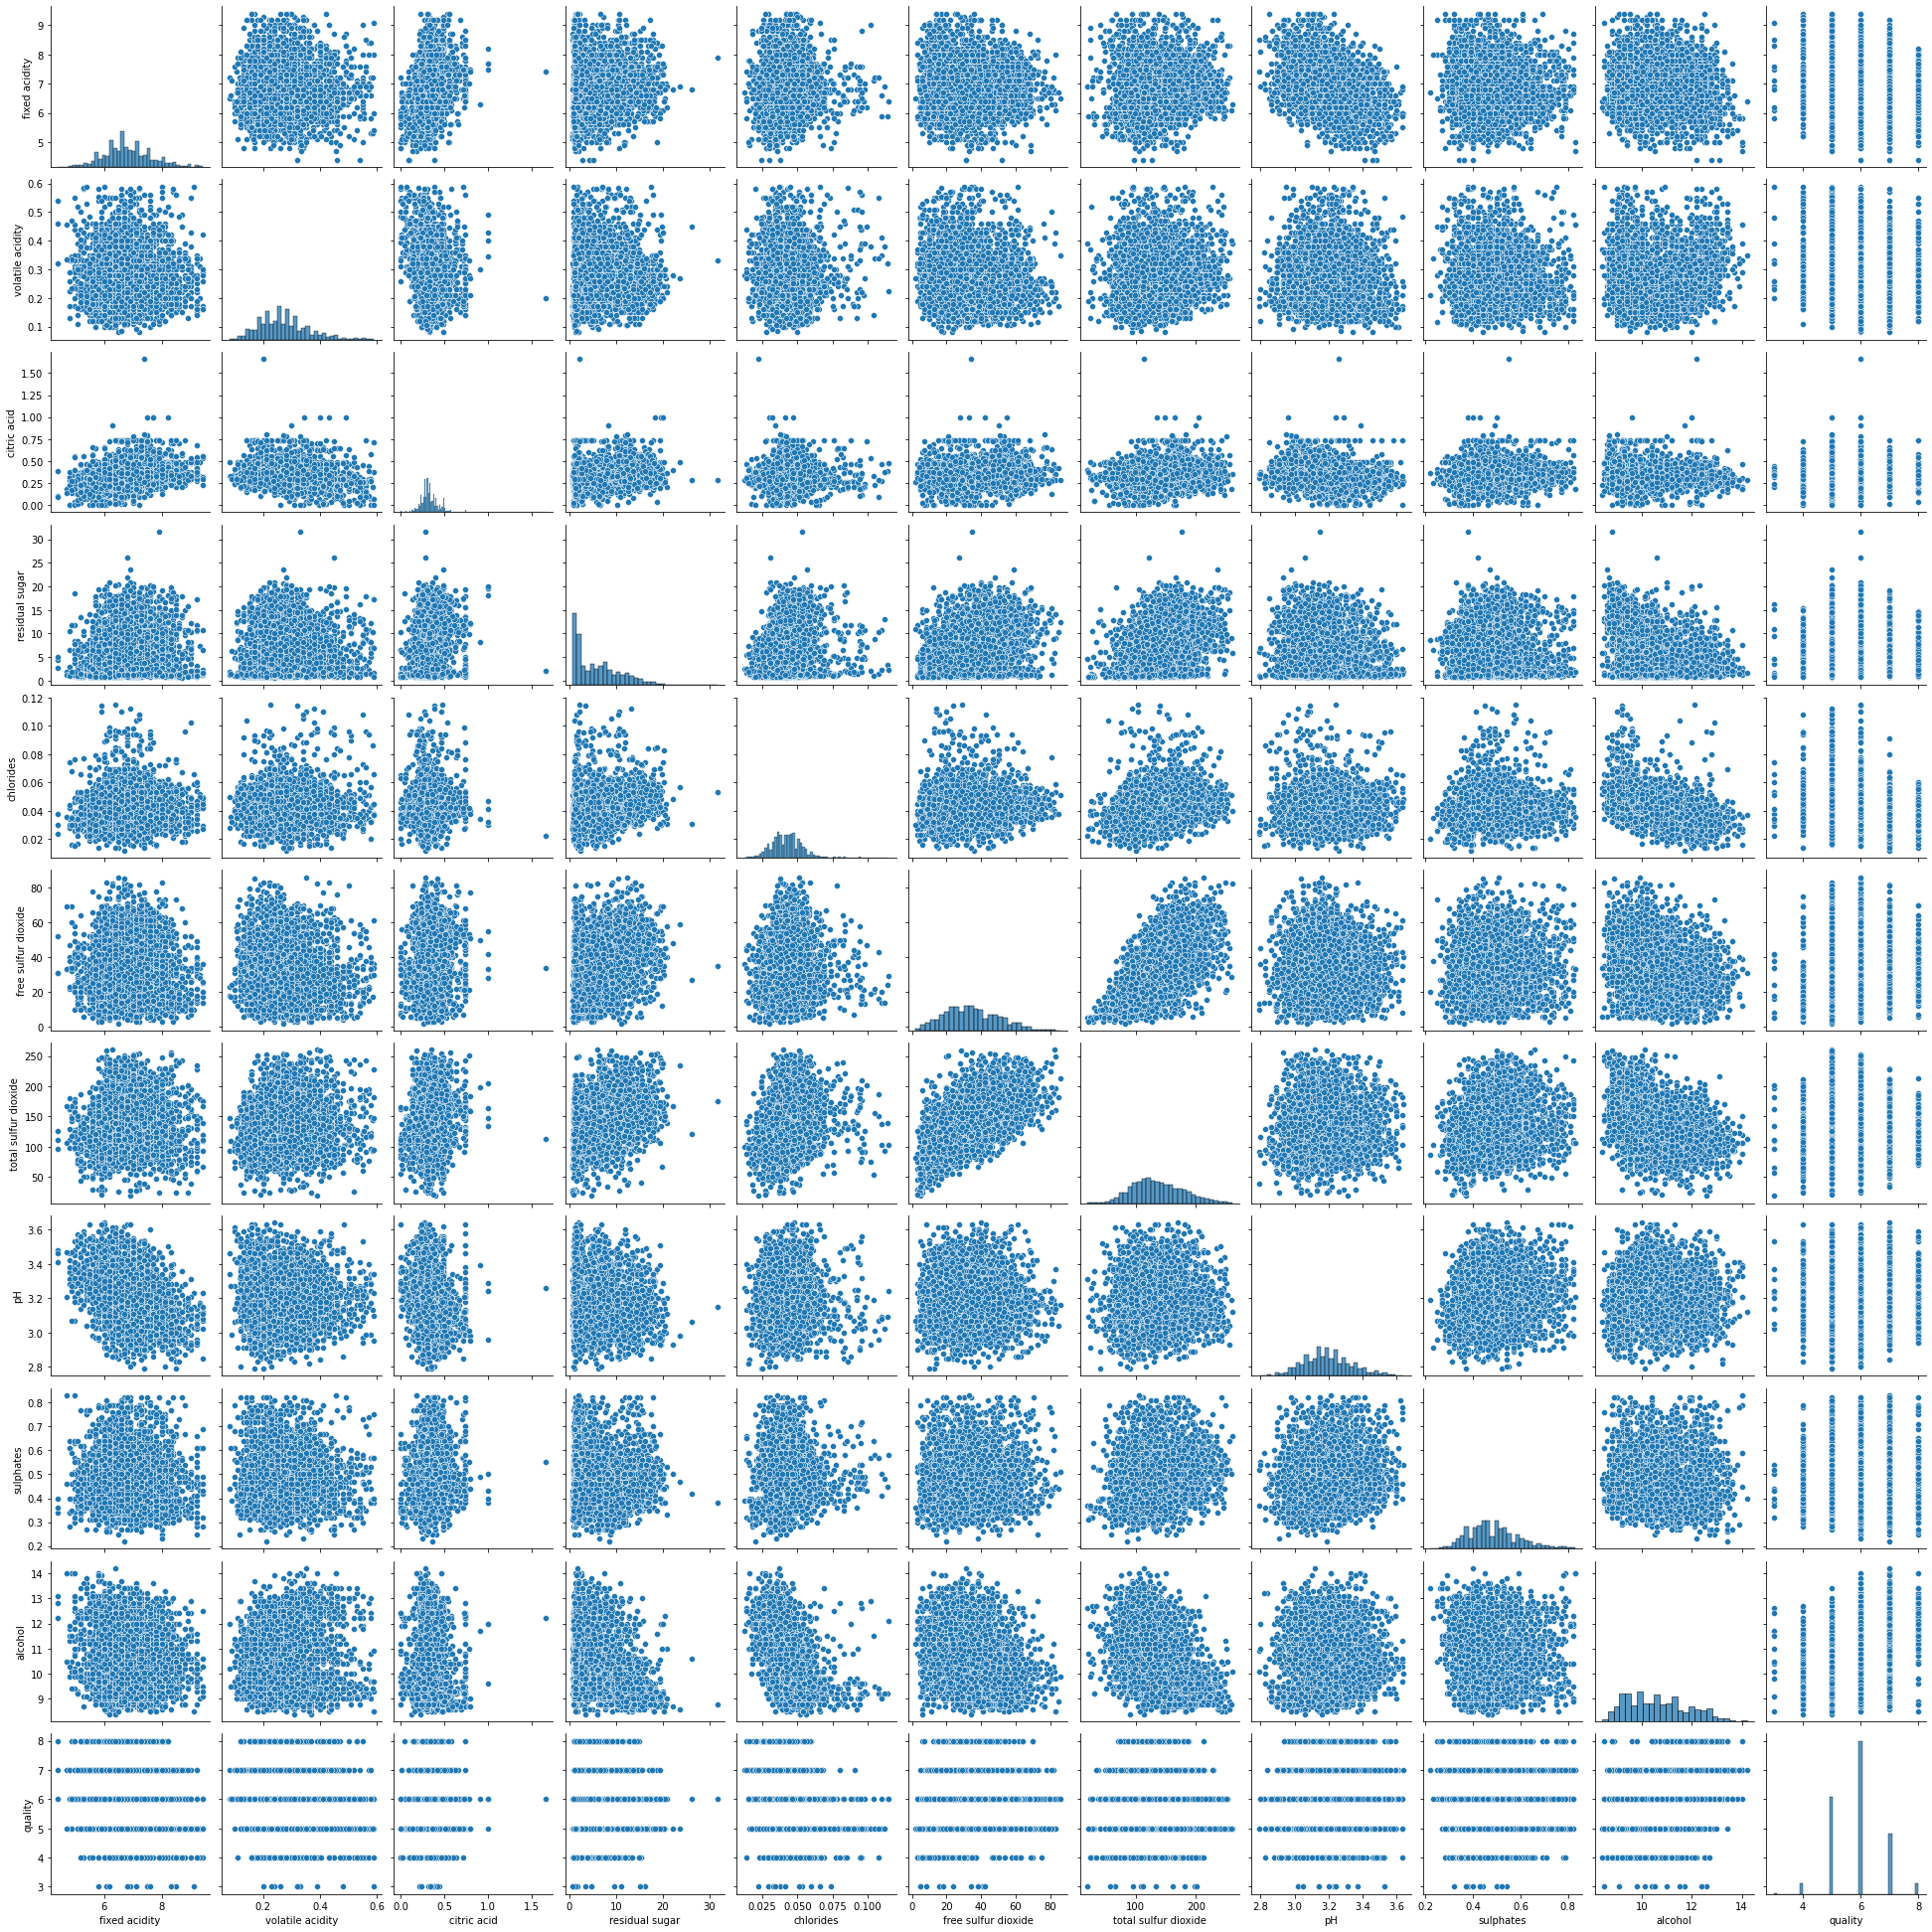

In [65]:
# Keep only original columns
df = df[original_cols]

# Visualize using sns.pairplot again to see if outliers were removed. 
sns.pairplot(df)

# Find which features have a linear relationship with quality.
* Plot below the linear relationship between each variable against quality.
* Use `sns.relplot`

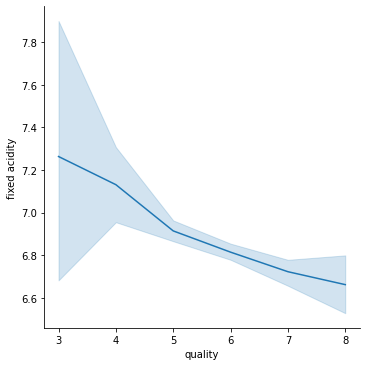

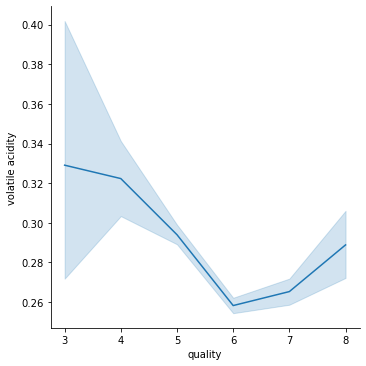

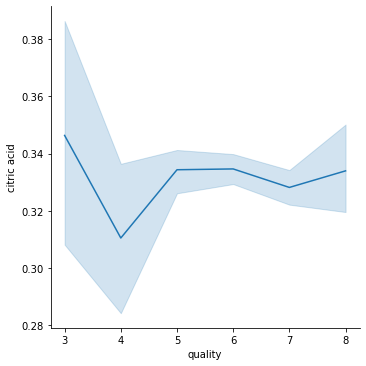

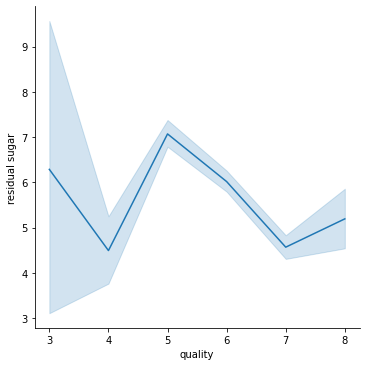

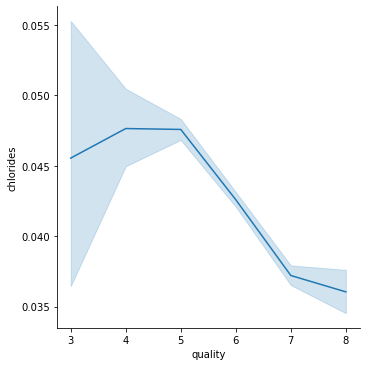

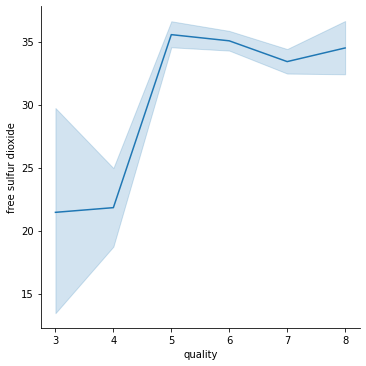

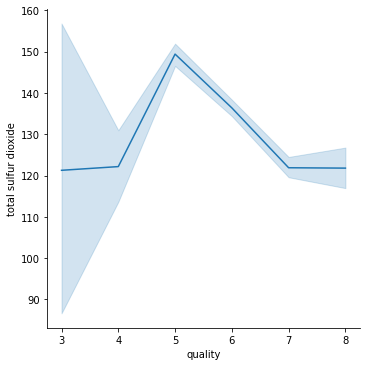

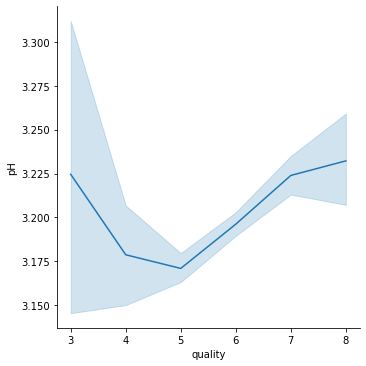

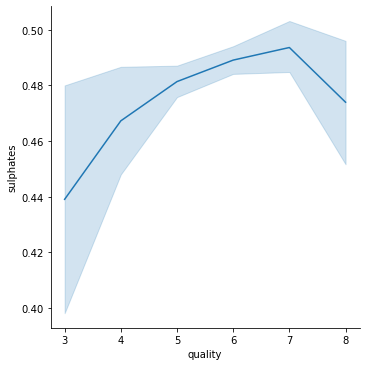

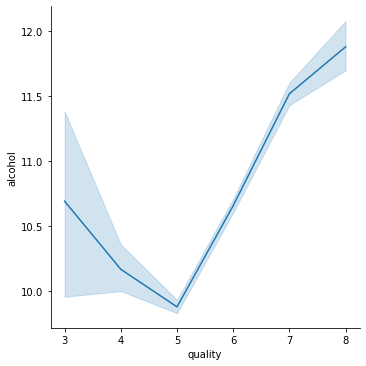

In [66]:
# Plot below the linear relationship between each variable against quality

all_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
               'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                   'pH', 'sulphates', 'alcohol']

# YOURE GOING TO NEED TO USE A LOOP

for feature in all_features:
    sns.relplot(data = df, y = feature, x = 'quality', kind = 'line', height=5, aspect=1)


# Select your predictor features and your target variable.
1. Keep only the features that have a linear relationship.  Store them as a list called `selected_features`
2. Define your `X` and `y` variables
3. Split our data into a training set and a testing set.

In [67]:
# 1. Keep only the features that have a linear relationship.  Store them as a list called `selected_features`
selected_features = ['sulphates', 'alcohol', 'pH', 'chlorides', 'fixed acidity', 'free sulfur dioxide']

In [68]:
# Define your X and y variables
X = df[selected_features].values


# 
y = df['quality'].values

In [69]:
# 3. Split our data into a training set and a testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

___
# STEP 3 (b): Build and train our model
1. Initialize our Linear Regression model.
2. Use our training data to fit aka train our model.


In [70]:
# 1. Initialize our Linear Regression model.
model = LinearRegression()


In [71]:
# 2. Use our training data to fit aka train our model.
model.fit(X_train, y_train)

LinearRegression()

___
# STEP 4 (e): Evaluate model.
1. Make new predicitions using our testing data.
2. Calculate R-Squared and Mean Absolute Error socres

In [72]:
# 1. Make new predicitions using our testing data.
y_pred = model.predict(X_test)
y_pred

array([6.27409308, 6.18419658, 6.15437996, 6.37919392, 5.71537132,
       6.6716675 , 5.84475552, 5.73712972, 5.08235612, 5.60058304,
       6.25168683, 5.19194544, 5.58856637, 5.43972442, 6.45251985,
       5.5754383 , 5.68703196, 5.90781024, 5.07739585, 5.99863819,
       6.05800662, 5.68626775, 6.51347725, 5.335658  , 5.98666163,
       5.66678576, 6.04186781, 6.28063549, 5.45321832, 5.48311233,
       5.48147563, 5.85001296, 5.61777355, 5.25082524, 7.10058463,
       5.46865202, 6.50987167, 5.890334  , 6.03789281, 6.49737223,
       5.78933412, 6.9293588 , 5.49230987, 5.73188964, 5.17157434,
       5.4086441 , 5.84788838, 6.21023762, 6.03384071, 6.01107397,
       6.02937439, 6.83868318, 5.79109178, 5.90505569, 5.94867922,
       5.62843399, 5.74183535, 6.8121599 , 5.90783913, 6.24051687,
       5.61032118, 5.80560377, 6.68874844, 5.39087414, 6.08222962,
       5.82941612, 6.05190583, 6.19372798, 5.72105791, 6.00126942,
       6.10848422, 6.74080304, 6.47274731, 5.99405386, 6.67478

# Now lets see how well the model explains the data by finding the R-Squared.
* You can think of r-squared as a goodness of fit measure for the model. 
* How well the trendline explains the variance of the data. 
* R-squared measure the strength of the relationship between your model and the dependent variable on a 0-100% scale.
* Remember for human labeled data like the quality of wine, .3 is pretty good.

In [73]:
# 2. Calculate R-Squared and Mean Absolute Error socres

r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

# USE SKLEARN'S MEAN_ABSOLUTE_ERROR FUNCTION TO SCORE OUR PREDICTIONS VS OUR ACTUAL
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

R-Squared Score: 0.2579387336248724
Mean Absolute Error: 0.5672913413170467


# Saving and exporting our model for future use.
* Use the library pickle to export the pickle

In [74]:
import pickle

# NAME YOUR MODEL 
filename = 'white-wine-model.pkl'

# EXPORT AND SAVE YOUR MODEL USING YOUR FILENAME
pickle.dump(model, open(filename, 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'white-wine-model.pkl'

___
# Random Forest Regression

Without step by step guidance, in the cell below, build a Random Forest Regression model and compare the r-squared and mean absolute error scores to the Linear Regression model.
* Dont forget, Random Forest can handle non-linear features!

* When splitting your data, make sure to use the same random state as you did for your Linear Regression model
    * `train_test_split(???, random_state=1)`

* Dont forget about `GridSearchCV` from our last lecture :) 

1. Which model proved to have better scores.
2. Why do you think that is...?


In [105]:
# Do complete Random Forest Regression model here...
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.svm import SVC 
import numpy as np


def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


# Take all features
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol']




# Pick target
target = ['quality']

# Pick X and y
X = df[features].values
y = df[target].values

# Split into testing/training sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]



random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_



print("***Normal untuned random forest regression***")
base_model = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=1)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)
y_pred = base_model.predict(X_test)
r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)



print("")
print("***Random search tuned random forest regression***")
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)
y_pred = best_random.predict(X_test)
r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


# Grid Search

# Take best parameters based on random search
# also why all ints, had to turn into lists
param_grid = {
 'n_estimators': [1400],
 'min_samples_split': [5],
 'min_samples_leaf': [1],
 'max_features': ['sqrt'],
 'max_depth': [30],
 'bootstrap': [True]
}

# Create a based model
rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

print("")
print("***Grid search tuned random forest regression***")
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)
y_pred = best_grid.predict(X_test)
r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\marin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Normal untuned random forest regression


<ipython-input-105-7098af9013e1>:81: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  base_model.fit(X_train, y_train)


Model Performance
Average Error: 0.7814
Accuracy = 86.34%.
R-Squared Score: 0.36207995782659275
Mean Absolute Error: 0.5243792370915407

Random search tuned random forest regression
Model Performance
Average Error: 0.7738
Accuracy = 86.46%.
R-Squared Score: 0.376228868359741
Mean Absolute Error: 0.5150017990864086
Improvement of 0.14%.
Fitting 3 folds for each of 1 candidates, totalling 3 fits


C:\Users\marin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)



Grid search tuned random forest regression
Model Performance
Average Error: 0.7734
Accuracy = 86.47%.
R-Squared Score: 0.3777183351146648
Mean Absolute Error: 0.5143224772491529
Improvement of 0.15%.


In [106]:
# 1. Which model proved to have better scores.


print('The  random forest regression has a considerably better R-Squared score.')

The  random forest regression has a considerably better R-Squared score.


In [107]:
# 2. Why do you think that is...?


print('Random forest regression is a more complex algorithm that tends to give better results, especially considering that we were able to use non-linear features.')

Random forest regression is a more complex algorithm that tends to give better results, especially considering that we were able to use non-linear features.
